In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
from matplotlib import cm
from formulaic import Formula
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from time import time
from sklearn.model_selection import KFold
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from formulaic import model_matrix

In [ ]:
!pip install tensorflow
!pip install keras
!pip install ipympl

In [166]:
from tf_regressor import Regressor , train_test_split_scale_center

**Ejercicio 1**

In [96]:
# (a) 
covid = pd.read_csv("casos_coronavirus.csv")
covid.head()

,fecha,confirmados_Nuevos
0,3-3-2020,1
1,4-3-2020,0
2,5-3-2020,1
3,6-3-2020,6
4,7-3-2020,0


In [97]:
covid["dias_transcurridos"] = covid.index

In [98]:
covid.head()

,fecha,confirmados_Nuevos,dias_transcurridos
0,3-3-2020,1,0
1,4-3-2020,0,1
2,5-3-2020,1,2
3,6-3-2020,6,3
4,7-3-2020,0,4


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


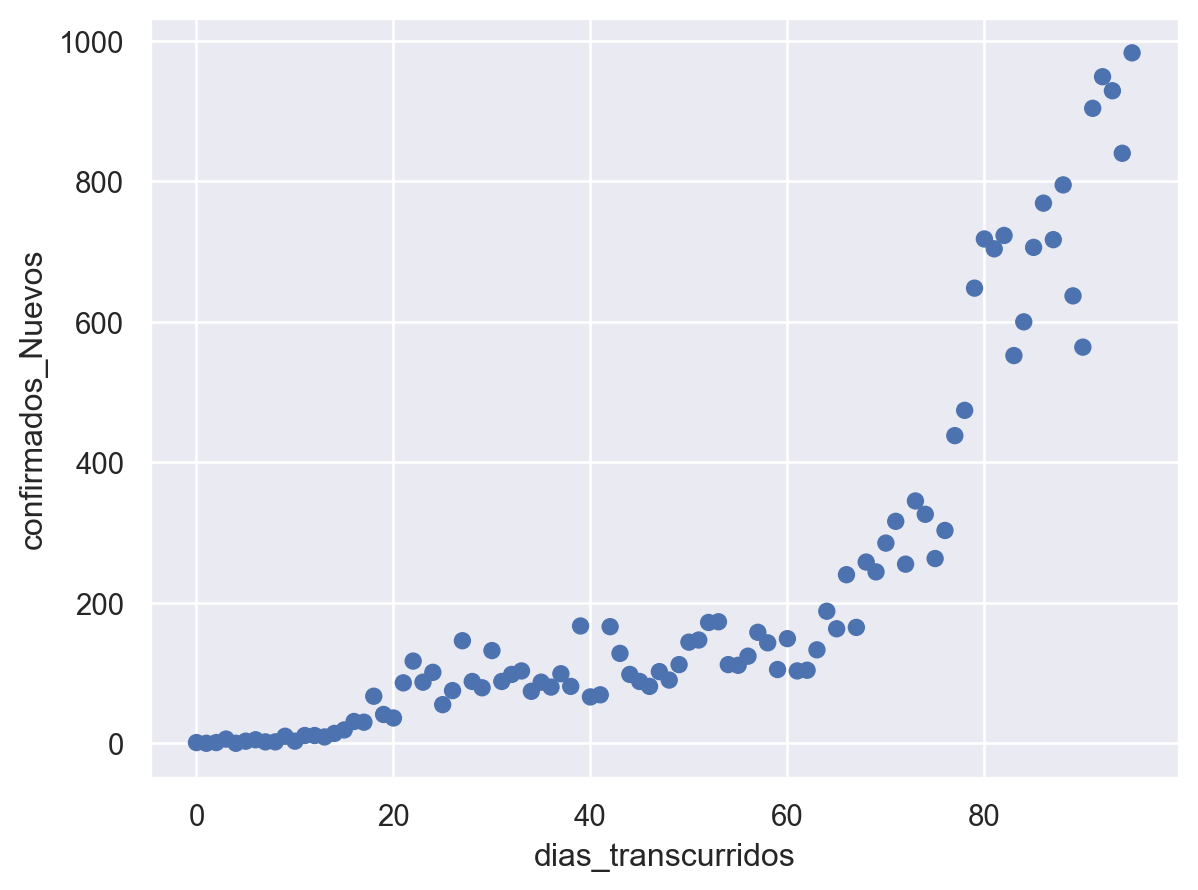

In [99]:
# (b)
(
    so.Plot(data=covid, x = "dias_transcurridos", y = "confirmados_Nuevos")
    .add(so.Dot())
)

In [183]:
f1 = lambda x, b,w : b + w[0]*x + w[1]*x**2
f2 = lambda x, b,w : b + (w[0]*(x**w[1]))
f3 = lambda x,b,w: b + w*e**x
f4 = lambda x,b,w: b + w[0]*np.e**(w[1]*x) 

In [149]:
covid["dias_transcurridos_nuevo"] = covid["dias_transcurridos"] ** 2
X_train, X_test, y_train, y_test = (train_test_split(
    covid[["dias_transcurridos", "dias_transcurridos_nuevo"]], covid["confirmados_Nuevos"], test_size=0.33, random_state=42))

In [150]:
X = covid[["dias_transcurridos", "dias_transcurridos_nuevo"]]
y = covid["confirmados_Nuevos"]

In [151]:
covid.head()

,fecha,confirmados_Nuevos,dias_transcurridos,dias_transcurridos_nuevo
0,3-3-2020,1,0,0
1,4-3-2020,0,1,1
2,5-3-2020,1,2,4
3,6-3-2020,6,3,9
4,7-3-2020,0,4,16


In [152]:
# modelo f1
m1 = linear_model.LinearRegression()
m1.fit(X_train, y_train)
y_pred = m1.predict(X_test)
r2_1 = r2_score(y_test, y_pred)
r2_1

0.8716700232783215

In [153]:
m1.fit(X,y)
y_pred = m1.predict(X)

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


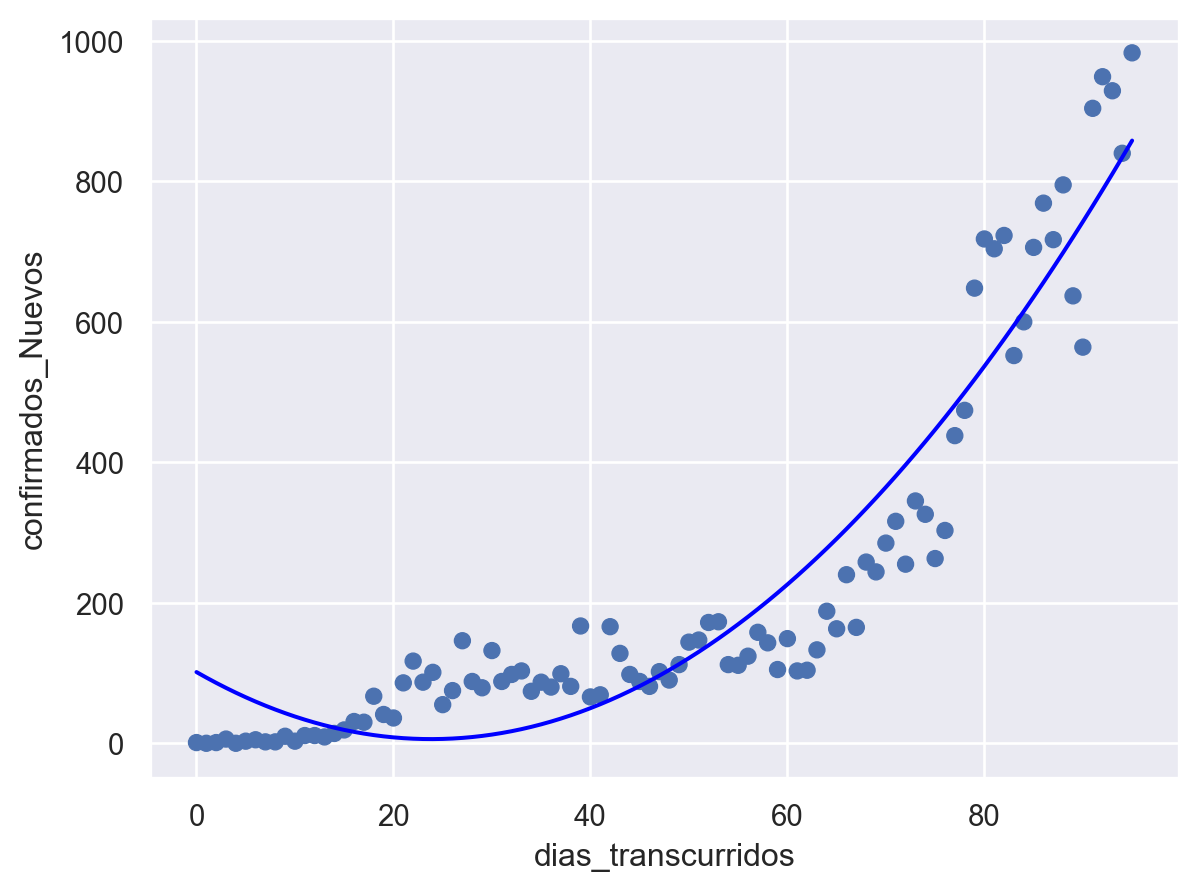

In [154]:
(
    so.Plot(data=covid, x='dias_transcurridos', y='confirmados_Nuevos')
    .add(so.Dot())
    .add(so.Line(color = "blue"), y=y_pred.flatten())
)

**¿Está bien esto?**

In [155]:
covid["dias_transcurridos_nuevo"] = np.e**(covid["dias_transcurridos"])
X_train, X_test, y_train, y_test = (train_test_split(
    covid[["dias_transcurridos", "dias_transcurridos_nuevo"]], covid["confirmados_Nuevos"], test_size=0.2, random_state=42)
)

In [156]:
X = covid[["dias_transcurridos", "dias_transcurridos_nuevo"]]
y = covid["confirmados_Nuevos"]

In [157]:
covid.head()

,fecha,confirmados_Nuevos,dias_transcurridos,dias_transcurridos_nuevo
0,3-3-2020,1,0,1.000000
1,4-3-2020,0,1,2.718282
2,5-3-2020,1,2,7.389056
3,6-3-2020,6,3,20.085537
4,7-3-2020,0,4,54.598150


In [158]:
# modelo f3
m3 = linear_model.LinearRegression()
m3.fit(X_train,y_train)
y_pred3 = m3.predict(X_test)
r2_3 = r2_score(y_test, y_pred3)
r2_3

0.19580050617195877

In [159]:
m3.fit(X,y)
y_pred3 = m3.predict(X)

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


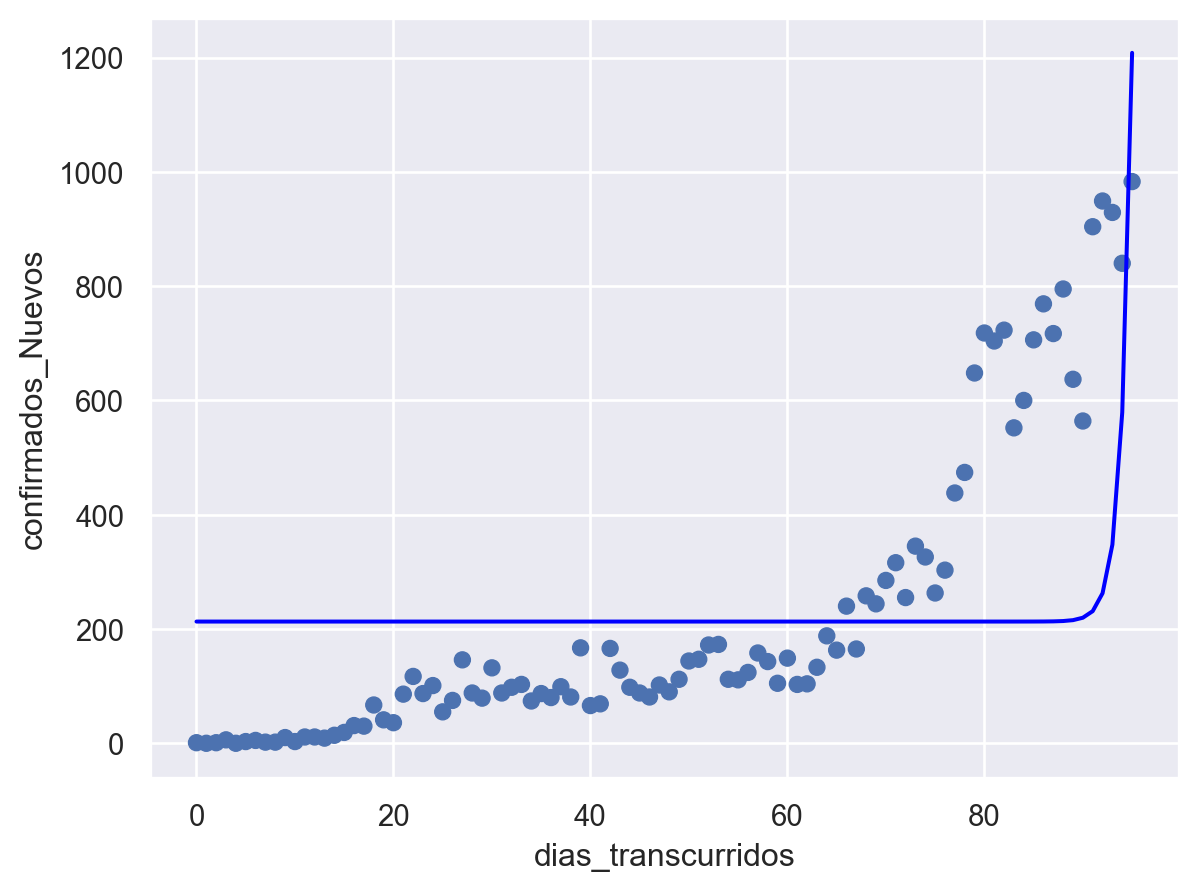

In [160]:
(
    so.Plot(data=covid, x='dias_transcurridos', y='confirmados_Nuevos')
    .add(so.Dot())
    .add(so.Line(color = "blue"), y=y_pred3.flatten())
)

In [259]:
X = covid[["dias_transcurridos"]]
y = covid["confirmados_Nuevos"]
# Normalizar los datos
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = (train_test_split_scale_center(
    X, y, center=False, test_size=0.2, random_state=42))

In [260]:
def f2(x, w, b): return (b + w[0] * (x ** w[1]))

In [299]:
# Inicializamos el modelo (por ahora no tiene nada)
m2 = Regressor()

# Le agregamos la funcion y especificamos la dimension de w 
m2.add_f(f2,                  # funcion del modelo 
         dim_w=2,            # dimension de w
         random_state=21, # semilla para selecciones aleatorias
         w0=np.array([1.0,1.0]),               # peso inicial
         b0=0.0,               # bias inicial,
         opt='gd'            # Especificamos que usamos descenso por gradiente
            )

# Entrenamos el modelo con los conjuntos de entrenamiento
m2.fit_(X_train, y_train,        # Conjuntos de entrenamiento 
           epochs=200,              # Cantidad de epocas
           validation_split=0.2,    # 20% de datos para validacion
           learning_rate=0.001,      # Learning rate inicial      
           verbose=1)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step - loss: 0.8810 - val_loss: 0.8596
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.8797 - val_loss: 0.8586
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.8784 - val_loss: 0.8576
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.8771 - val_loss: 0.8566
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.8758 - val_loss: 0.8556
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 0.8746 - val_loss: 0.8546
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.8733 - val_loss: 0.8537
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.8720 - val_loss: 0.8527
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 0.8708 - val_loss: 0.8517
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.8695 - val_loss: 0.8508
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.8683 - val_loss: 0.8498
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.8

In [300]:
# Imprimimos los pesos y el bias resultantes del entrenamiento
print(m2.weights_)
print(m2.bias_)

[0.9801485 1.0640285]
-0.16809687


In [301]:
# Evaluamos el MSE en el conjunto de testeo
m2.evaluate(X_test.to_numpy(), y_test,        # A TensorFlow no le gustan los DataFrame de pandas 
               return_dict=True,                            # Devuelve un diccionario (por si usamos mas de una métrica)
               verbose=1,                                   # No imprima en pantalla el procedimiento de evaluación
               batch_size=len(y_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: nan


{'loss': nan}

# Preguntas:
**¿Por qué no puedo usar la f2 definida como una función lambda y tengo que usar f2 como la función que definí arriba?**

**¿Por qué me devuelve {'loss': nan} cuando evalúo el modelo?**

In [311]:
# Bueno pruebo con el último
X = covid[["dias_transcurridos"]]
y = covid["confirmados_Nuevos"]
# Normalizar los datos
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = (train_test_split_scale_center(
    X, y, center=False, test_size=0.2, random_state=42))

def f4(x,b,w): return (b + w[0]*(np.e**(w[1]*x)))

In [312]:
# Inicializamos el modelo (por ahora no tiene nada)
m4 = Regressor()

# Le agregamos la funcion y especificamos la dimension de w 
m4.add_f(f4,                  # funcion del modelo 
         dim_w=2,            # dimension de w
         random_state=21, # semilla para selecciones aleatorias
         w0=np.array([1.0,1.0]),               # peso inicial
         b0=0.0,               # bias inicial,
         opt='gd'            # Especificamos que usamos descenso por gradiente
            )

# Entrenamos el modelo con los conjuntos de entrenamiento
m4.fit_(X_train, y_train,        # Conjuntos de entrenamiento 
           epochs=200,              # Cantidad de epocas
           validation_split=0.2,    # 20% de datos para validacion
           learning_rate=0.001,      # Learning rate inicial      
           verbose=1)

Epoch 1/200


ValueError: Exception encountered when calling Regressor.call().

[1mAttempting to slice scalar input. for '{{node regressor_57_1/strided_slice}} = StridedSlice[Index=DT_INT32, T=DT_FLOAT, begin_mask=0, ellipsis_mask=0, end_mask=0, new_axis_mask=0, shrink_axis_mask=1](regressor_57_1/ReadVariableOp, regressor_57_1/strided_slice/stack, regressor_57_1/strided_slice/stack_1, regressor_57_1/strided_slice/stack_2)' with input shapes: [], [1], [1], [1] and with computed input tensors: input[3] = <1>.[0m

Arguments received by Regressor.call():
  • x=tf.Tensor(shape=(76, 1), dtype=float32)

**Ejercicio 2**

In [313]:
titanic = sns.load_dataset("titanic")

In [339]:
nan = titanic.isna().sum() # calcula NaN en cada columna
ind_max = nan.argmax() # calculo el índice de la columna con mayor nro de NaN
max_nan = nan.index[ind_max] # accedo a la columna

In [341]:
titanic = titanic.drop(max_nan, axis=1)